# Newton method
- [Hessian矩阵](https://note.youdao.com/ynoteshare1/index.html?id=a3dda151febf0da4dc17df5ec918b41b&type=note)
- [logistic regression](https://note.youdao.com/ynoteshare1/index.html?id=a62bb63c6a049ce5e0cdc8abfe8ba3fd&type=note)

- [参考资源](https://github.com/Sierkinhane/CS229-ML-Implements/blob/master/00-SupervisedLearning/02-Classification/02-NewtonMethod.py)

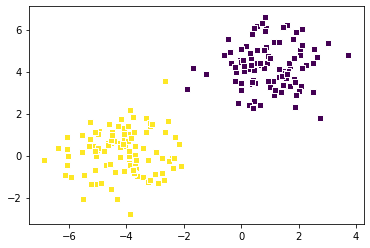

In [1]:
# original method, use numpy to implement
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from math import exp, log
import copy

## Hyper-paramters definition
LR = 0.05
EPOCH = 5
# numpy.random.normal(loc=0.0, scale=1.0, size=None)  
# loc:float 概率分布的均值，对应着整个分布的中心center
# scale:float概率分布的标准差，对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高
# size:int or tuple of ints
# 我们更经常会用到np.random.randn(size)所谓标准正太分布（μ=0, σ=1），对应于np.random.normal(loc=0, scale=1, size)
THETA = np.random.normal(0, 0.1, 3).reshape(3, 1) # learnable parameters
# https://www.jianshu.com/p/069d8841bd8e make_blobs函数是为聚类产生数据集
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=3)
# plt.scatter(X[:, 0], X[:, 1], c=Y)
# plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train, edgecolors='white', marker='s')
plt.show()

X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train_original = copy.deepcopy(X_train)
X_train = np.concatenate((X0_train,X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)

THETA [[-1.06531132e+10  1.39442695e+09  2.80997670e+09]
 [-1.06531132e+10  1.39442695e+09  2.80997670e+09]
 [-1.06531132e+10  1.39442695e+09  2.80997670e+09]]


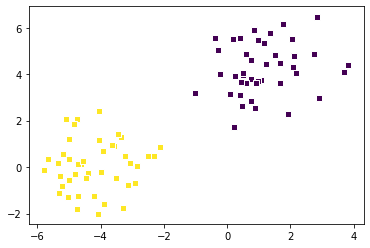

In [2]:
def linear_h(theta, x):
    #print(x)
    h_x = np.matmul(theta.T,x.T)
    return h_x

def sigmoid(x):
    z = linear_h(THETA,x)[0]
    # evade outofrange error
    if z > 50:
        z = 50
    if z < -50:
        z = -50
    g = 1/(1 + exp(-z))
    return g

def loss_function(sample):
    x,y = sample[0], sample[1][0]
    #print(x,y)
    p = sigmoid(x)
    #print(p)
    if p == 1:
        p = 1-0.000000001
    loss = -y*log(p)-(1-y)*log(1-p)
    #print(loss)
    return loss

# return a hessian matirx for parameters updating
# g(z)= \frac{1}{1+e^{-z}}
# g'(z)= g(z)(1-g(z))
# g''(z) = -g(z)(1-g(z)
def hessian(sec_derivative ,x):
    H = np.zeros((x.size, x.size), dtype='float32')
    #print(x, sec_derivative)
    for i in range(x.size):
        for j in range(x.size):
            # sometimes sec_derivative would be 0, adding 0.000000001 is to make sure the H is non-singular
            H[i, j] = (sec_derivative+0.000000001) *x[i] *x[j]
    return H

## Fourth step: Updating parameters
def update_parameters(THETA, y, x):
    #x = np.reshape(x, THETA.shape)
    # print(x)
    g = sigmoid(x)
    # for Hessian matirx
    sec_derivative = -g *(1- g) # *xi *xj --> a hessian entry
    # shape of H = (x.size, x.size)
    H = hessian(sec_derivative, x)
    #print(H)
    # update parameters
    # Actually should inverse H
    THETA = THETA - np.matmul(inv(H), (y-g) *x)
    return THETA

for ep in range(EPOCH):
    for index in range(X_train.shape[0]):
        x = X_train[index:(index+1),:].reshape([3]) # 1*2 matrix
        y = Y_train[index:(index+1)]#1
        #print(batch_X)
        h_X = sigmoid(x)
        loss = loss_function((x,y))
        THETA = update_parameters(THETA, y, x)


i = 0
print('THETA', THETA)
H_test = np.zeros([Y_test.shape[0], 1], dtype=Y_test.dtype)
for x, y in zip(X_test, Y_test):
    H_test[i,0] = np.around(sigmoid(x))
    i+=1
plt.figure(1)
x = np.linspace(-7, 4, 50)
plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test[:, 0], edgecolors='white', marker='s')
plt.show()